**LAB-02**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
df= pd.read_csv("C:/Users/91969/Desktop/SEM 4/Machine learning/dataset/train.csv/train.csv")
df.head()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,748.0,2.75,1.0,75.00,24,6.300,105.300,0
1,1187.0,3.43,1.0,105.00,24,13.200,142.200,0
2,730.0,3.12,1.0,71.25,0,26.625,97.875,1
3,671.0,5.63,3.0,90.00,0,9.750,99.750,0
4,329.0,2.09,1.0,45.00,12,13.200,70.200,0


In [3]:
df.shape

(209673, 8)

In [4]:
df.describe()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
count,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000
mean,1173.181478,5.054431,1.292808,99.623431,13.030824,15.136829,127.791084,0.280523
std,4775.653621,125.217419,0.930754,85.602702,20.367764,12.553436,98.797374,0.449256
min,0.000000,0.020000,0.000000,0.000000,0.000000,-0.500000,0.000000,0.000000
25%,446.000000,1.950000,1.000000,52.500000,0.000000,6.000000,70.200000,0.000000
50%,707.000000,3.200000,1.000000,75.000000,9.000000,9.750000,101.700000,0.000000
75%,1098.000000,5.730000,1.000000,116.250000,20.000000,26.450000,152.250000,1.000000
max,86387.000000,57283.910000,9.000000,4466.250000,2500.000000,435.000000,4472.250000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209673 entries, 0 to 209672
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   trip_duration       209673 non-null  float64
 1   distance_traveled   209673 non-null  float64
 2   num_of_passengers   209673 non-null  float64
 3   fare                209673 non-null  float64
 4   tip                 209673 non-null  int64  
 5   miscellaneous_fees  209673 non-null  float64
 6   total_fare          209673 non-null  float64
 7   surge_applied       209673 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 12.8 MB


In [6]:
df.isnull().sum()

trip_duration         0
distance_traveled     0
num_of_passengers     0
fare                  0
tip                   0
miscellaneous_fees    0
total_fare            0
surge_applied         0
dtype: int64

**Data Visualization**

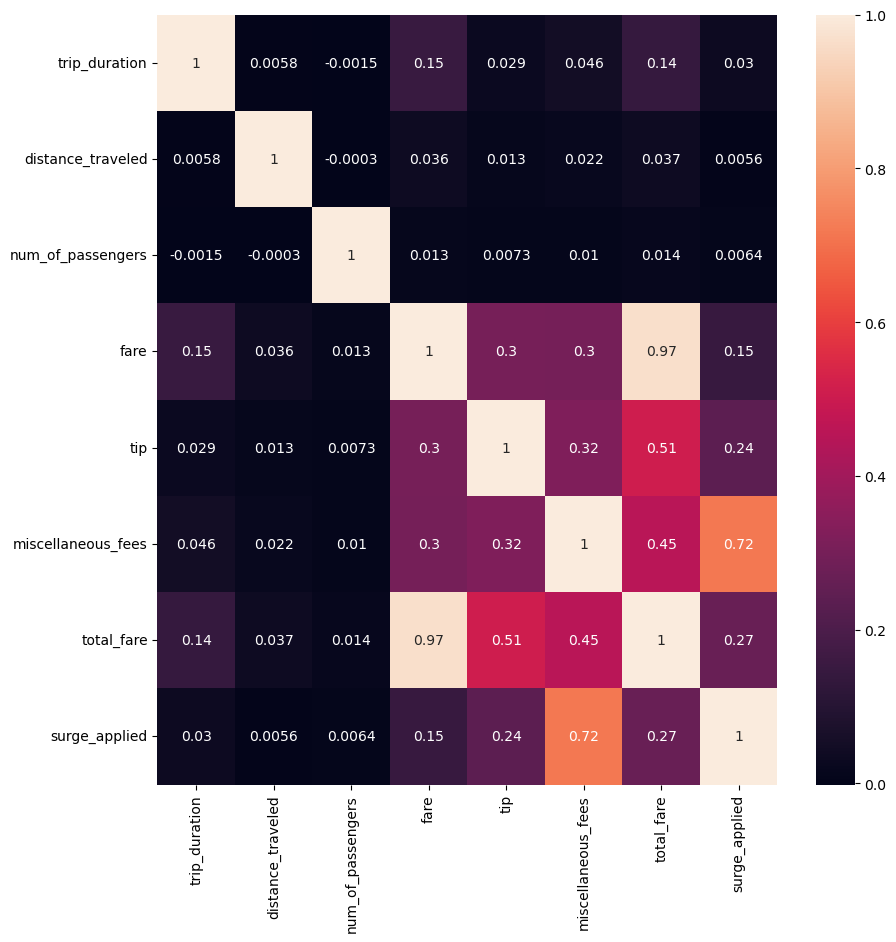

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

The heatmap visualizes correlations between various features in the taxi trip dataset. Strong positive correlations are observed between fare, tip, and total_fare, indicating that higher base fares and tips contribute to increased total fares. Additionally, distance_traveled positively correlates with total_fare, suggesting that longer distances result in higher fares. Weak correlations, such as between trip_duration and num_of_passengers, suggest minimal influence of passenger count on trip duration. Surge pricing's impact on total fare is implied but not explicitly shown. 

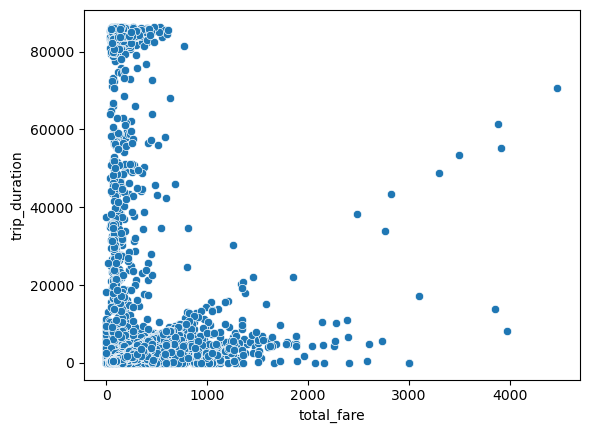

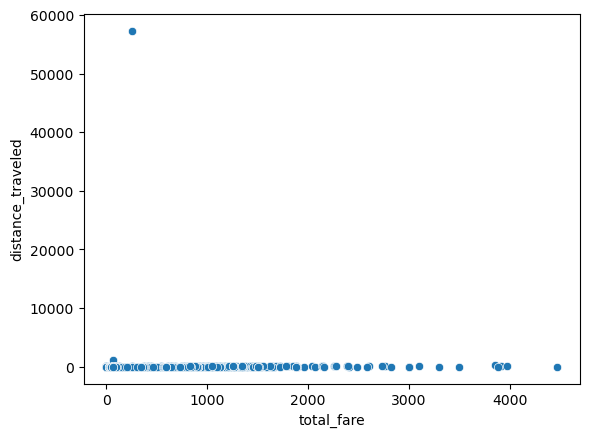

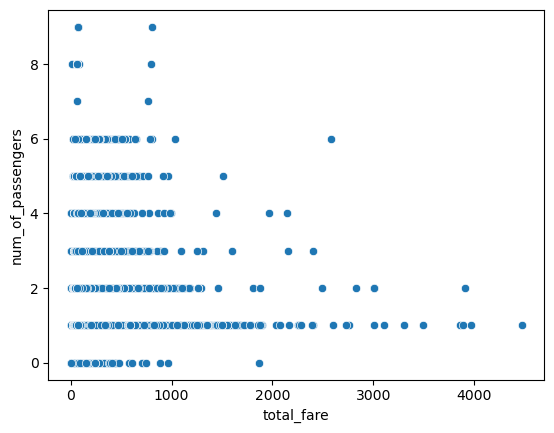

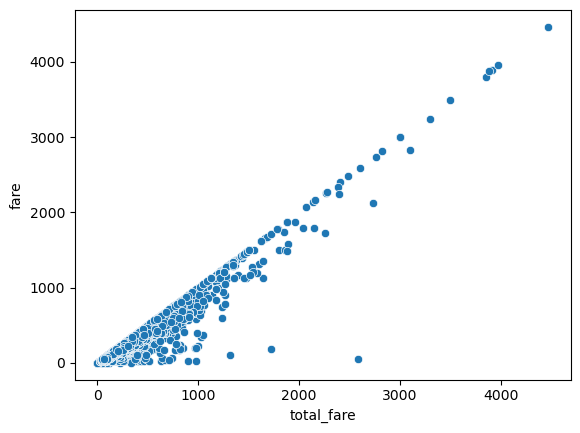

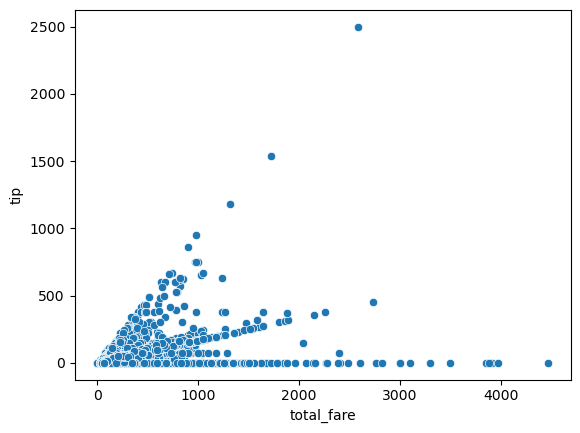

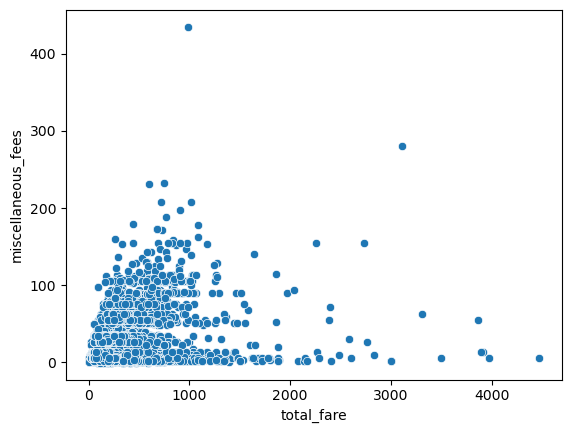

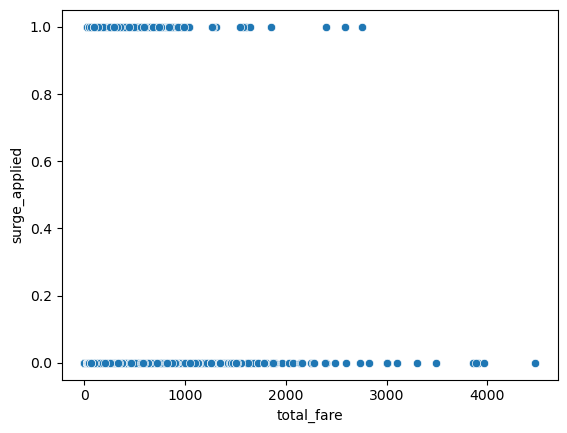

In [8]:
for col in df.columns:
    if col != 'total_fare':
        sns.scatterplot(x=df['total_fare'], y=df[col])
        plt.show()

Positive linear relationship: Longer trip durations generally result in higher total fares.
distance_traveled vs. total_fare:

Positive linear relationship: Increased distance traveled correlates with higher total fares.
num_of_passengers vs. total_fare:

No clear pattern: Total fare appears to vary regardless of the number of passengers.
fare vs. total_fare:

Positive linear relationship: Higher base fares lead to higher total fares.
tip vs. total_fare:

Positive linear relationship: Larger tips correlate with higher total fares.
miscellaneous_fees vs. total_fare:

No clear pattern: Total fare does not seem strongly influenced by miscellaneous fees.
surge_applied vs. total_fare:

No clear pattern: Presence of surge pricing does not show a consistent impact on total fare.

**Train and Test Split**

In [9]:
X = df.drop(columns='total_fare')
X

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,surge_applied
0,748.0,2.75,1.0,75.00,24,6.300,0
1,1187.0,3.43,1.0,105.00,24,13.200,0
2,730.0,3.12,1.0,71.25,0,26.625,1
3,671.0,5.63,3.0,90.00,0,9.750,0
4,329.0,2.09,1.0,45.00,12,13.200,0
...,...,...,...,...,...,...,...
209668,1617.0,8.42,1.0,150.00,47,5.800,0
209669,438.0,1.29,1.0,48.75,12,34.575,1
209670,571.0,2.82,1.0,63.75,0,6.000,0
209671,491.0,2.16,1.0,56.25,0,13.500,0


In [10]:
y = df['total_fare']
y

0         105.300
1         142.200
2          97.875
3          99.750
4          70.200
           ...   
209668    202.800
209669     95.325
209670     69.750
209671     69.750
209672    339.750
Name: total_fare, Length: 209673, dtype: float64

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Feature Scaling**

In [25]:
STD = StandardScaler()
X_train_SD = STD.fit_transform(X_train)
X_test_SD = STD.transform(X_test)

**Model Training**

In [32]:
LR = LinearRegression()
LR.fit(X_train_SD, y_train)

LinearRegression()

In [1]:
y_hat = LR.predict(X_test_SD)

NameError: name 'LR' is not defined

**Model Evaluation**


In [15]:
print("mse: ", mean_squared_error(y_hat, y_test))

mse:  3.473722029833163e-27


In [16]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
accuracy = regressor.score(X_test, y_test)
print("Accuracy:",(int(round(accuracy*100))))

Accuracy: 100


In [17]:
print("mae: ", mean_absolute_error(y_hat, y_test))

mae:  3.516311812818896e-14


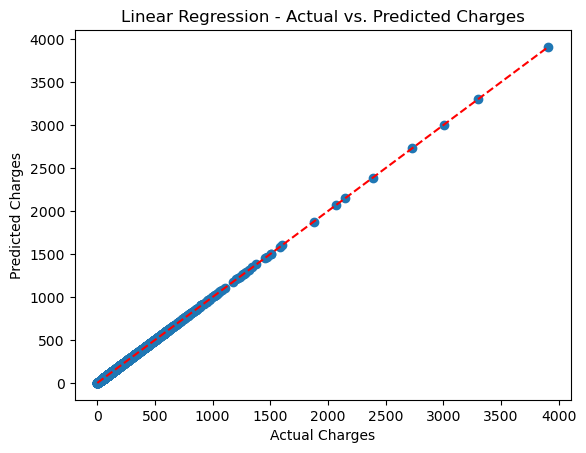

In [18]:
plt.scatter(y_test, y_hat)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Linear Regression - Actual vs. Predicted Charges')
plt.show()

In [19]:
# To retrieve the intercept:
print(regressor.intercept_) 

-8.526512829121202e-14


In [20]:
# For retrieving the slope (coefficient of x):
print(regressor.coef_)

[ 3.68949741e-17 -1.39940559e-17 -1.49684473e-14  1.00000000e+00
  1.00000000e+00  1.00000000e+00  3.84079752e-16]


In [21]:
y_pred = regressor.predict(X_test)
y_pred 

array([ 66.   ,  51.   , 163.5  , ...,  63.75 , 236.625,  43.5  ])

In [22]:
# To compare the actual output values for X_test with the predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
110587,66.000,66.000
43371,51.000,51.000
84310,163.500,163.500
160055,212.250,212.250
172966,126.000,126.000
...,...,...
1248,116.625,116.625
48614,306.450,306.450
201198,63.750,63.750
194357,236.625,236.625


In [23]:
import statistics
SSE=sum((y_pred-y_test)**2)
SST = sum((statistics.mean(y_pred)-y_test)**2)
R2=1-SSE/SST
R2

1.0

**Model Pickling**

In [33]:
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(LR, file)

with open('model.pkl', 'rb') as file:
    picked_model = pickle.load(file)

# Generate new data for prediction
# Let's create a single new data point for prediction
new_data = pd.DataFrame({
    'trip_duration': [748.0],
    'distance_traveled': [2.75],
    'num_of_passengers': [1.0],
    'fare': [75.00],
    'tip': [24],
    'miscellaneous_fees': [6.3],
    'surge_applied': [0]
})

# Predict using the loaded model
predictions = picked_model.predict(new_data)

print("New Data: ", new_data)
print("Predicted Total Fare: ", predictions)


New Data:     trip_duration  distance_traveled  num_of_passengers  fare  tip  \
0          748.0               2.75                1.0  75.0   24   

   miscellaneous_fees  surge_applied  
0                 6.3              0  
Predicted Total Fare:  [7101.04223384]


C:\Users\91969\anaconda3\D\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


The predicted total fare of approximately 7101.04 units is primarily influenced by factors such as the base fare, tip amount, and any miscellaneous fees.